Notes for the assignment:
"sample_data.csv" presents sensor data for a random train 'X'

The data is a time-series sensor collection for a single vehicle on a Light Rail Transit System.

The data is intentionally fused with results from a commercial Inertial Navigation System (INS). The INS is not perfect.

gps_date_time: unix time since epoch in UTC

acc_x, acc_y, acc_z: the acceleration from accelerometer measured in gravity (g).

gyr_x, gyr_y, gyr_z: the angular speed from gyroscope measured in degrees/sec.

roll, pitch, yaw: the pose of the IMU measured in degrees. 

h_accuracy: GNSS/GPS horizontal accuracy level measured in mm. 

speed: absolute GNSS/GPS speed measured in mph.

direction: NB stands for Northbound; SB stands for Southbound. 

front_end: the light rail vehicle is a dual-end vehicle that can operate (back-and-forth) with its A-end or B-end.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
from sqlalchemy import create_engine
import seaborn as sns
import datetime
from sklearn.cluster import AgglomerativeClustering 

In [3]:
df_given = pd.read_csv("sample_data.csv")

print ("Rows     : " , df_given.shape[0])  #get number of rows/observations
print ("Columns  : " , df_given.shape[1]) #get number of columns

df_given.head()

Rows     :  496803
Columns  :  22


sno  gps_date_time     acc_x     acc_y     acc_z     gyr_x     gyr_y  \
0    0   1.695290e+09 -0.135092 -0.003541 -1.012043 -0.505542  0.600871   
1    1   1.695290e+09 -0.128710  0.002780 -1.004179 -0.720638  0.576246   
2    2   1.695290e+09 -0.139544 -0.002823 -0.997271 -0.809773  0.426642   
3    3   1.695290e+09 -0.183031  0.011281 -0.998475 -0.810944  0.210753   
4    4   1.695290e+09 -0.185566  0.003353 -0.996067 -1.044925  0.328140   

      gyr_z      roll     pitch  ...  lon  height  h_accuracy      speed  \
0 -0.262194 -0.486900 -3.080796  ...  NaN     NaN         NaN  14.890877   
1 -0.292448 -0.536355 -2.744073  ...  NaN     NaN         NaN  13.856694   
2 -0.367948 -0.632393 -2.512191  ...  NaN     NaN         NaN  12.661456   
3 -0.283987 -0.895797 -2.550347  ...  NaN     NaN         NaN  11.466218   
4 -0.287198 -1.026855 -2.558945  ...  NaN     NaN         NaN  10.270980   

   is_stopped  last_known_lat  last_known_lon  update_timestamp  direction  \
0         0.0             0.0             0.0      1.695290e+09        NaN   
1         0.0             0.0             0.0      1.695290e+09        NaN   
2         0.0             0.0             0.0      1.695290e+09        NaN   
3         0.0             0.0             0.0      1.695290e+09        NaN   
4         0.0             0.0             0.0      1.695290e+09        NaN   

   front_end  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 22 columns]

Removing the index values provided with the dataset:

In [4]:
df_db = df_given[['gps_date_time',
              'acc_x', 'acc_y', 'acc_z',
              'gyr_x', 'gyr_y', 'gyr_z',
              'roll', 'pitch', 'yaw',
              'lat', 'lon', 'height',
              'h_accuracy',
              'speed',
              'is_stopped',
              'last_known_lat', 'last_known_lon',
              'update_timestamp',
              'direction', 'front_end']].copy()

In [5]:
# Converting the .csv file into a database to replicate real life cases. Using sqlite3.
conn = sqlite3.connect("train.db")
df_db.to_sql('sample_data', conn, if_exists = "replace")
conn.close()

In [6]:
query = """SELECT * FROM sample_data"""
engine = create_engine("sqlite:///train.db")

df = pd.read_sql(query, engine)
df.head()

index  gps_date_time     acc_x     acc_y     acc_z     gyr_x     gyr_y  \
0      0   1.695290e+09 -0.135092 -0.003541 -1.012043 -0.505542  0.600871   
1      1   1.695290e+09 -0.128710  0.002780 -1.004179 -0.720638  0.576246   
2      2   1.695290e+09 -0.139544 -0.002823 -0.997271 -0.809773  0.426642   
3      3   1.695290e+09 -0.183031  0.011281 -0.998475 -0.810944  0.210753   
4      4   1.695290e+09 -0.185566  0.003353 -0.996067 -1.044925  0.328140   

      gyr_z      roll     pitch  ...  lon  height  h_accuracy      speed  \
0 -0.262194 -0.486900 -3.080796  ...  NaN     NaN         NaN  14.890877   
1 -0.292448 -0.536355 -2.744073  ...  NaN     NaN         NaN  13.856694   
2 -0.367948 -0.632393 -2.512191  ...  NaN     NaN         NaN  12.661456   
3 -0.283987 -0.895797 -2.550347  ...  NaN     NaN         NaN  11.466218   
4 -0.287198 -1.026855 -2.558945  ...  NaN     NaN         NaN  10.270980   

   is_stopped  last_known_lat  last_known_lon  update_timestamp  direction  \
0         0.0             0.0             0.0      1.695290e+09       None   
1         0.0             0.0             0.0      1.695290e+09       None   
2         0.0             0.0             0.0      1.695290e+09       None   
3         0.0             0.0             0.0      1.695290e+09       None   
4         0.0             0.0             0.0      1.695290e+09       None   

   front_end  
0       None  
1       None  
2       None  
3       None  
4       None  

[5 rows x 22 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496803 entries, 0 to 496802
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             496803 non-null  int64  
 1   gps_date_time     496801 non-null  float64
 2   acc_x             496158 non-null  float64
 3   acc_y             496158 non-null  float64
 4   acc_z             496158 non-null  float64
 5   gyr_x             496158 non-null  float64
 6   gyr_y             496158 non-null  float64
 7   gyr_z             496158 non-null  float64
 8   roll              496158 non-null  float64
 9   pitch             496158 non-null  float64
 10  yaw               496158 non-null  float64
 11  lat               429385 non-null  float64
 12  lon               429385 non-null  float64
 13  height            429385 non-null  float64
 14  h_accuracy        416867 non-null  float64
 15  speed             485294 non-null  float64
 16  is_stopped        49

There are 496802 entries, time series data is for the period 5 days and 18 hours.
This data is from September 21, 2023 to October 8, 2023. (much more than 5-6 days.)
Hence the data is not continuous.

In [8]:
df.isna().sum()

index                    0
gps_date_time            2
acc_x                  645
acc_y                  645
acc_z                  645
gyr_x                  645
gyr_y                  645
gyr_z                  645
roll                   645
pitch                  645
yaw                    645
lat                  67418
lon                  67418
height               67418
h_accuracy           79936
speed                11509
is_stopped             645
last_known_lat         645
last_known_lon         645
update_timestamp       645
direction           196935
front_end           196935
dtype: int64

In [10]:
df.describe().T

count          mean            std           min  \
index             496803.0  2.484010e+05  143414.817230  0.000000e+00   
gps_date_time     496801.0  1.696128e+09  621383.462123  1.695290e+09   
acc_x             496158.0 -4.932932e-02       0.035485 -3.574899e-01   
acc_y             496158.0  3.194473e-03       0.015184 -2.439119e-01   
acc_z             496158.0 -1.000835e+00       0.004143 -1.300937e+00   
gyr_x             496158.0 -6.423379e-01       0.169819 -2.832862e+00   
gyr_y             496158.0  2.874667e-01       0.082684 -8.506775e-01   
gyr_z             496158.0 -3.405438e-01       1.040246 -1.563725e+01   
roll              496158.0  6.430147e-01       1.312610 -2.041707e+01   
pitch             496158.0 -1.195059e+00       1.514483 -1.897484e+01   
yaw               496158.0 -3.691166e+00     102.425517 -2.002017e+03   
lat               429385.0  4.077226e+01       0.101367  4.037195e+01   
lon               429385.0 -7.418164e+01       0.070118 -7.690004e+01   
height            429385.0  2.552877e+01    4244.707176 -7.311503e+02   
h_accuracy        416867.0  4.343801e+03    6283.530600  3.969307e+01   
speed             485294.0  6.498105e+00      23.479249  1.000000e-03   
is_stopped        496158.0  6.043801e-01       0.488984  0.000000e+00   
last_known_lat    496158.0  4.076117e+01       0.586374  0.000000e+00   
last_known_lon    496158.0 -7.416606e+01       1.051356 -7.690004e+01   
update_timestamp  496158.0  1.696128e+09  621483.650996  1.695290e+09   

                           25%           50%           75%           max  
index             1.242005e+05  2.484010e+05  3.726015e+05  4.968020e+05  
gps_date_time     1.695415e+09  1.696543e+09  1.696667e+09  1.696792e+09  
acc_x            -5.135254e-02 -4.900697e-02 -4.700807e-02  2.730822e-01  
acc_y            -1.517778e-03  3.119860e-03  7.865199e-03  2.370775e-01  
acc_z            -1.001414e+00 -1.000969e+00 -1.000292e+00 -8.730782e-01  
gyr_x            -6.694615e-01 -6.426065e-01 -6.209306e-01  1.446849e+00  
gyr_y             2.741672e-01  2.877264e-01  3.009279e-01  1.438141e+00  
gyr_z            -3.124275e-01 -3.036581e-01 -2.947515e-01  1.275359e+01  
roll              1.491074e-01  6.751917e-01  1.230253e+00  2.109507e+01  
pitch            -1.618857e+00 -1.228210e+00 -3.980128e-01  1.519304e+01  
yaw              -9.049593e+01 -6.284811e-01  8.892466e+01  1.885146e+03  
lat               4.076566e+01  4.078042e+01  4.078056e+01  6.873706e+01  
lon              -7.418550e+01 -7.418517e+01 -7.417969e+01 -5.506372e+01  
height           -1.493043e+01  2.541300e+00  5.598193e+00  1.521388e+06  
h_accuracy        2.490747e+02  1.853823e+03  5.824361e+03  6.477400e+04  
speed             7.351981e-02  1.788453e-01  5.557049e+00  7.746801e+02  
is_stopped        0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
last_known_lat    4.075123e+01  4.078038e+01  4.078055e+01  6.873706e+01  
last_known_lon   -7.418545e+01 -7.418510e+01 -7.417832e+01  0.000000e+00  
update_timestamp  1.695415e+09  1.696543e+09  1.696668e+09  1.696792e+09

The reading of the speed sensor seems to be faulty, since light rail cars do not apporach speeds of 100mph, let alone 700mph.
The reading of the height sensor at some places also seems faulty as max height is not possible.

NOTE: There are a lot of missing fields in the data which can provide information about the data infering from where and when they present.

I am now try to find out as much as I can from the data pertinent to location of the train. I will step through the time series in big numbers because of the sheer length of the data.

In [9]:
fig = px.scatter_mapbox(df.iloc[::10, :], 
                        lat="lat", 
                        lon="lon", 
                        zoom=12, 
                        height=600,
                        width=600,
                        color = "is_stopped",
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

From the map, I can see the train stops at Washington Street and Military Park, which serve the NLR. Hence it can be conculded that the trains go to those stops as well, completing the loop. But for the sake of assessment, I'm only including deductions which can be drawn only from the data provided (and common sense).

I have found all the stops for the train (excluding Washington street and Military Park).

Grove St,
Silver Lake,
Branch Brook Park,
Davenport Ave,
Bloomfield Ave,
Park Ave,
Orange St,
Norfolk St,
Warren St,
.
.
.
NJPAC/Center St,
Atlantic St,
Riverfront Stadium,
Washington Park,
Broad St Station

I can see there is a missing piece of location data from Warren St to Newark Penn Station. I will try to find why but I can intuitively guess that it pertains to the height of the train.

In [10]:
fig = px.scatter_mapbox(df.iloc[::10, :], 
                        lat="lat", 
                        lon="lon", 
                        zoom=12, 
                        height=600,
                        width=600,
                        color = "height",
                        range_color=[-50,50]
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We can conclude that the train from Grove Street to Warren Street is on one grade. The rail from Newark-Penn to Broad street is on another grade. While it is tempting for me to conclude that the latter is below grade, I am not sure if negative height refers to a lower grade.

There seems to be a lot of errenous data at grove street with respect to the height sensor.

Now I will try to comment some things related to the operating speed of the train.

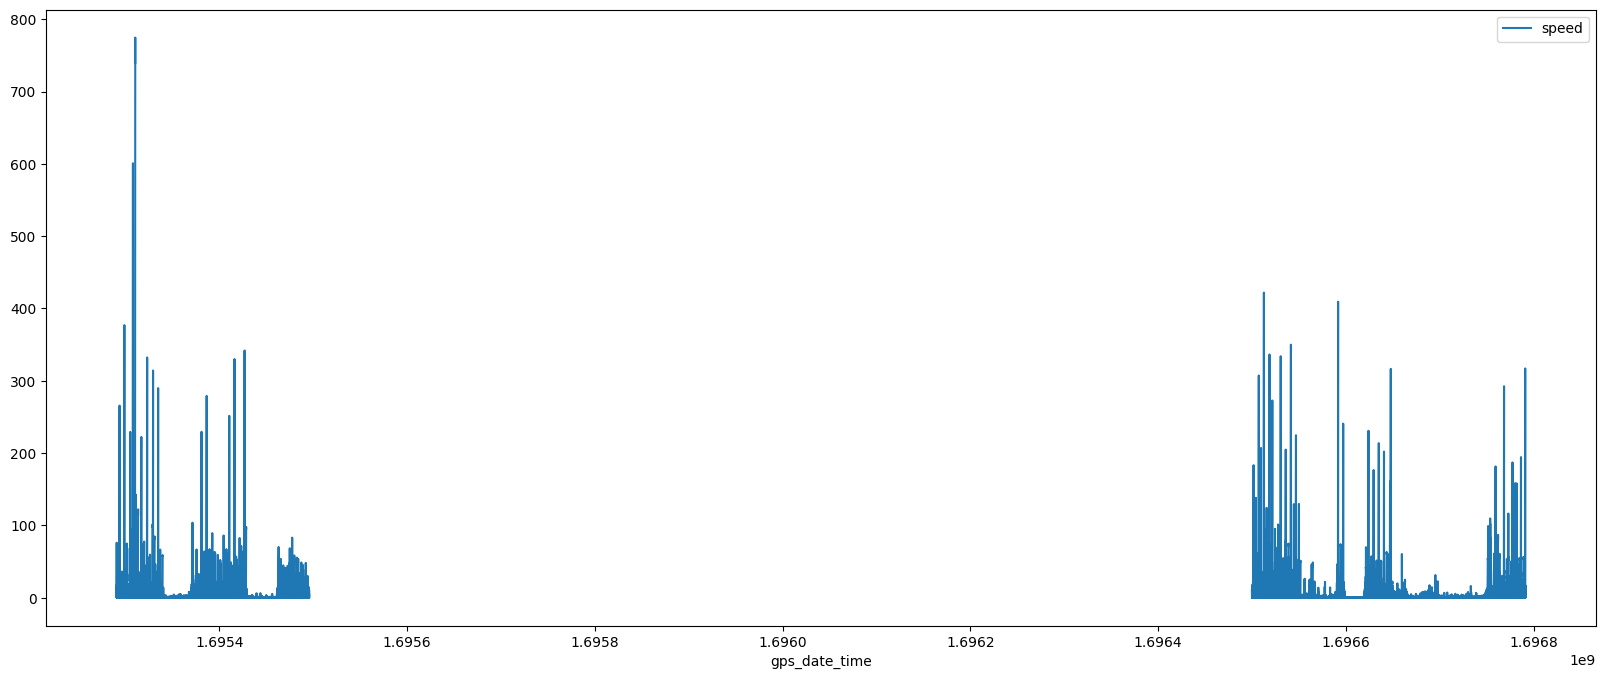

In [11]:
df_speed = df[['gps_date_time', 'speed']].copy()

df.plot(x='gps_date_time', y='speed', kind='line', figsize=(20, 8))
plt.show()

For clarity, I'm applying a limit to the x-axis for a specific time period, top speed limit to y-axis. As mentioned previously, the speed is pretty errorsome. I'll try to figure out why.

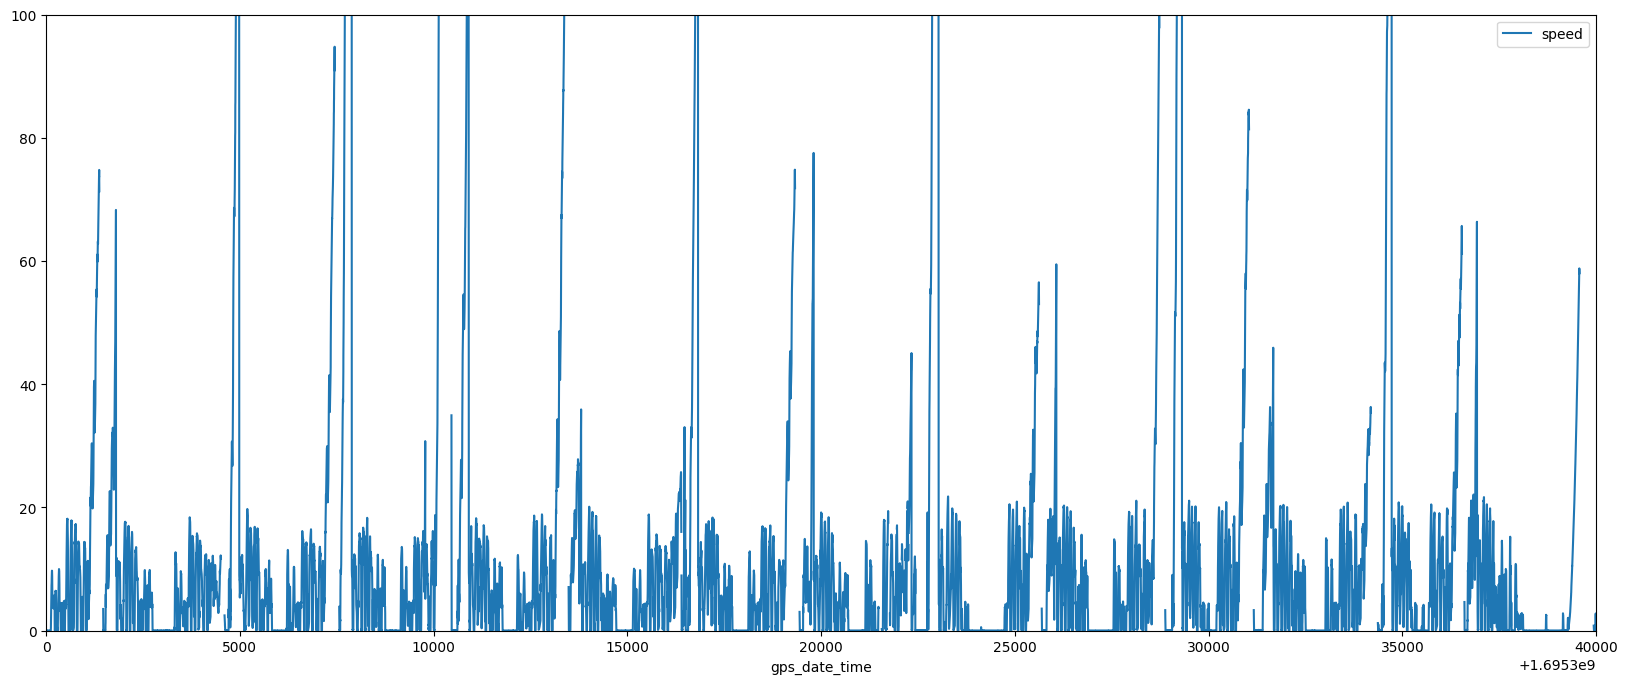

In [12]:
df_speed = df[['gps_date_time', 'lat', 'lon', 'speed', 'is_stopped']].copy()

df_speed.plot(x='gps_date_time', xlim = (1695300000, 1695340000), y='speed', ylim=(0, 100), kind='line', figsize=(20, 8))
plt.show()



I can see the speed peak to an errennous amount around 1.6953e9 + 5000, and this pattern repeats itself many times over the track. Looking at the raw data, I found the timestamp 1695304982, where the train recorded a speed of 229.139718mph, which is not possible. Since the pattern it pretty repetitive (as expected for a train in a closed loop), I am convinced that this error occurs in a specific part of the train. Let's see where does this happen on track.

In [13]:
df_speed = df_speed[df_speed.speed > 100]

fig = px.scatter_mapbox(df_speed.iloc[::10, :], 
                        lat="lat", 
                        lon="lon", 
                        zoom=12, 
                        height=600,
                        width=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

As expected, the speed sensor fails at a paticular section. I dont think there is a valid theory to justify this, but I am inclined to think it is because of the tech the sensor uses, i.e. GPS, coupled with inability to capture data underground. I can't justify this theory since the data for where this occurs is simply missing.

Now i will calculate the average interstation speed.

In [14]:
df_speed = df[['gps_date_time', 'lat', 'lon', 'speed', 'is_stopped']].copy()
df_speed = df_speed[df_speed.speed < 80]

inter_speed = []
temp = []
s_flag = False
def avg(lst): 
    return sum(lst) / len(lst) 

for index, row in df_speed.iterrows():
    if row['is_stopped'] == 0 and not s_flag:
        s_flag = True
        temp.append(row['speed'])
    elif row['is_stopped'] == 0 and s_flag:
        temp.append(row['speed'])
    elif row['is_stopped'] == 1 and s_flag:
        inter_speed.append(avg(temp))
        temp.clear()
        s_flag = False

df_inter = pd.DataFrame(inter_speed, columns=['inter_speed'])

df_inter.describe()


inter_speed
count  2592.000000
mean      9.238602
std       9.988391
min       0.012636
25%       3.244135
50%       7.634090
75%      10.262656
max      68.736145

The inter-station train speeds seems to operate at 20mph-30mph for the most part and occasionally touching speeds of 70mph. The average speed is about 10mph.

Now I will try to figure out the schedule of the train.

In [15]:
df_stops = df[['gps_date_time', 'lat', 'lon', 'is_stopped']]
df_stops = df_stops.dropna()

sch_list = []

s_flag = False
for index, row in df_stops.iterrows():
    if row['is_stopped'] == 1 and not s_flag:
        s_flag = True

        time = row['gps_date_time']
        lat = row['lat']
        lon = row['lon']

        sch_list.append([time, lat, lon])

    if row['is_stopped'] == 0 and s_flag:
        s_flag = False

df_stops = pd.DataFrame(sch_list, columns=['time', 'lat', 'lon'])

def unix_to_dt(u_t):
    # return datetime.datetime.fromtimestamp(u_t, datetime.timezone(datetime.timedelta(hours=-5)))
    return datetime.datetime.fromtimestamp(u_t)

dt_list = []

for index, row in df_stops.iterrows():
    dt_list.append(unix_to_dt(row['time']))

df_stops.insert(1, "DTtime", dt_list, True)


This map gives the Schedule of the train.

In [16]:
fig = px.scatter_mapbox(df_stops, 
                        lat="lat", 
                        lon="lon", 
                        zoom=12, 
                        height=600,
                        width=600,
                        hover_data= 'DTtime'
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

To provide the schedule in a more readable format i will cluster the stops around a station and give them names.

In [17]:
stops = []
for index, row in df_stops.iterrows():
    stops.append([row['lat'], row['lon']])

clustering = AgglomerativeClustering(n_clusters=30).fit(stops)

df_stops.insert(2, 'stn_number', clustering.labels_, True)

Removing all the clusters, which do not coincide with any stop.

In [18]:
for n in {6, 26, 4, 20, 2, 22, 1, 11}:
    df_stops = df_stops.drop(df_stops[df_stops['stn_number'] == n].index)

df_stops = df_stops.reset_index()
del df_stops['index']

fig = px.scatter_mapbox(df_stops, 
                        lat="lat", 
                        lon="lon", 
                        zoom=12, 
                        height=600,
                        width=600,
                        hover_data= 'stn_number'
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Now, I will convert the stn_number into names.

In [19]:
stn_name = []
for index, row in df_stops.iterrows():
    if row['stn_number'] == 19 or row['stn_number'] == 9:
        stn_name.append('Grove St')
    elif row['stn_number'] == 0:
        stn_name.append('Silver Lake')
    elif row['stn_number'] == 7:
        stn_name.append('Branch Brook Park')
    elif row['stn_number'] == 5:
        stn_name.append('Davenport Ave.')
    elif row['stn_number'] == 8:
        stn_name.append('Bloomfield Ave.')
    elif row['stn_number'] == 17 or row['stn_number'] == 27:
        stn_name.append('Park Ave.')
    elif row['stn_number'] == 28 or row['stn_number'] == 16:
        stn_name.append('Orange St.')
    elif row['stn_number'] == 3:
        stn_name.append('Norfolk St.')
    elif row['stn_number'] == 12:
        stn_name.append('Warren St./ NJIT')
    elif row['stn_number'] == 18 or row['stn_number'] == 29:
        stn_name.append('Newark Penn Station')
    elif row['stn_number'] == 13:
        stn_name.append('NJPAC/ Center St.')
    elif row['stn_number'] == 17 or row['stn_number'] == 27:
        stn_name.append('Park Ave.')
    elif row['stn_number'] == 21:
        stn_name.append('Harriet Tubman Square')
    elif row['stn_number'] == 25:
        stn_name.append('Atlantic St.')
    elif row['stn_number'] == 10:
        stn_name.append('Riverfront Stadium')
    elif row['stn_number'] == 14 or row['stn_number'] == 24:
        stn_name.append('Broad St.')
    else:
        stn_name.append('Unknown')

df_stops.insert(3, "station_name", stn_name, True)

df_stops = df_stops.drop(columns=['stn_number','time','lat','lon'])

df_stops

DTtime         station_name
0    2023-09-21 06:02:09     Warren St./ NJIT
1    2023-09-21 06:03:11          Norfolk St.
2    2023-09-21 06:05:03           Orange St.
3    2023-09-21 06:06:49            Park Ave.
4    2023-09-21 06:08:18      Bloomfield Ave.
...                  ...                  ...
1723 2023-10-08 14:45:46  Newark Penn Station
1724 2023-10-08 14:51:46     Warren St./ NJIT
1725 2023-10-08 14:52:58          Norfolk St.
1726 2023-10-08 14:54:56           Orange St.
1727 2023-10-08 14:55:23           Orange St.

[1728 rows x 2 columns]

The above Table is the schedule of the train.

Now I will calculate the time for which the train stops at average.

In [20]:
sch_list = []

s_flag = False
t_count = 0
for index, row in df.iterrows():
    if row['is_stopped'] == 1 and not s_flag:
        s_flag = True
        t_count = 1
    elif row['is_stopped'] == 1 and s_flag:
        t_count+=1
    elif row['is_stopped'] == 0 and s_flag:
        sch_list.append(t_count)
        t_count = 0
        s_flag = False

df_sch = pd.DataFrame(sch_list, columns=['time'])

In [21]:
df_sch.mode(axis=0)

time
0     8

Hence, we can say that the average stop time of the train is about 8 seconds.

In [14]:
count = 0
for index, row in df.iterrows():
    if row['roll'] > 18:
        # print(len(row['gps_date_time']))
        count += 1
print(count)

86
